<a href="https://colab.research.google.com/github/niharali/SecureDataExchange/blob/main/2_ML_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy tensorflow scikit-learn


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Step 1: Gather data to train the ML model
def generate_synthetic_data(samples=1000, key_length=16):
    X = np.random.randint(0, 2, (samples, key_length))
    y = np.sum(X, axis=1) + np.random.normal(0, 1, samples)  # Strength is a function of the key bits
    return X, y


In [4]:
# Generate synthetic data
X, y = generate_synthetic_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 2: Use algorithms like neural networks to learn encryption patterns
# Define a simple neural network model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer predicting the "strength"
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=0)

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error on Test Data: 1.2544956040633277


In [10]:
# Step 3: Adjust encryption parameters based on model insights
# In a real-world scenario, you would use the model's output to tweak parameters
# For demonstration, we'll assume the model gives us a predicted "strength" that we want to maximize

# Step 4: Implement the optimized encryption process
# Use the model to predict the strength of a new set of keys
new_keys = np.random.randint(0, 2, (5, X_train.shape[1]))
predicted_strengths = model.predict(new_keys)

print("\nNew Keys and their Predicted Strengths:")
for key, strength in zip(new_keys, predicted_strengths):
    print(f"Key: {key} -> Predicted Strength: {strength[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

New Keys and their Predicted Strengths:
Key: [0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0] -> Predicted Strength: 7.132287502288818
Key: [0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0] -> Predicted Strength: 9.52956485748291
Key: [1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1] -> Predicted Strength: 8.7886323928833
Key: [1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0] -> Predicted Strength: 8.697853088378906
Key: [1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0] -> Predicted Strength: 8.62554931640625


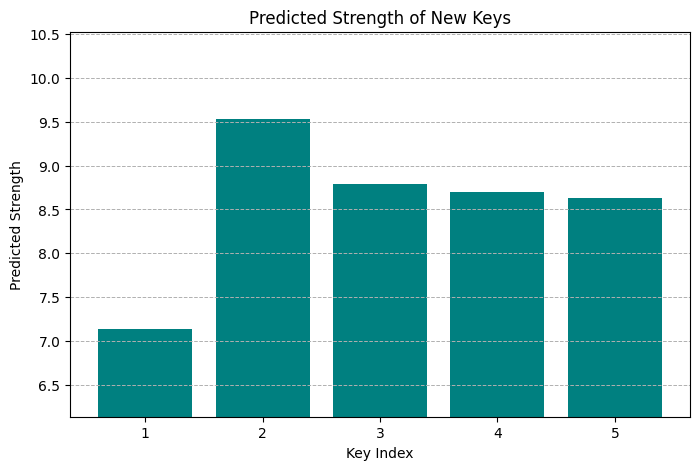

In [11]:
import matplotlib.pyplot as plt

# Using the data from the previous execution

# Create a bar chart to represent the predicted strengths of new keys
key_indices = np.arange(1, 6)  # Numbering the keys from 1 to 5
predicted_strengths_flat = predicted_strengths.flatten()

plt.figure(figsize=(8, 5))
plt.bar(key_indices, predicted_strengths_flat, color='teal')
plt.xlabel('Key Index')
plt.ylabel('Predicted Strength')
plt.title('Predicted Strength of New Keys')
plt.xticks(key_indices)
plt.ylim(min(predicted_strengths_flat) - 1, max(predicted_strengths_flat) + 1)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()